In [18]:
# Imports
import json
from pandas.io.json import json_normalize
import requests
import pyspark as ps
import pandas as pd
import numpy as np

In [28]:
# Methods
def unpack_column(dataFrame,col_name):
    newDf = dataFrame.from_records(dataFrame[col_name].dropna().tolist())
    return newDf

def unpack_and_destroy(dataFrame,column):
    temp = unpack_column(dataFrame,column)
    for col in temp.columns:
        dataFrame[col] = temp[col]
    #dataFrame = dataFrame.drop(columns=[column])
    return dataFrame


In [25]:
API_url = "https://api.data.charitynavigator.org/v2/Organizations?app_id=4239274b&app_key=c78b1e5cf16a02eaf43992fbb60ce979&pageSize=1000&pageNum=1&rated=true&sort=RATING%3ADESC"
API_dataFrame = pd.read_json(API_url)

In [26]:
#Unpacking the Dictionaries
for col in API_dataFrame:
    if type(API_dataFrame[col][0]) == dict:
        unpack_and_destroy(API_dataFrame,col)

In [27]:
API_dataFrame.head()

,advisories,category,cause,charityName,charityNavigatorURL,currentRating,donationAddress,ein,irsClassification,mailingAddress,...,nteeType,rulingDate,subsection,city,country,postalCode,stateOrProvince,streetAddress1,streetAddress2,_rapid_links
0,"{'severity': None, 'active': {'_rapid_links': ...","{'categoryName': 'Health', 'categoryID': 5, 'c...","{'causeID': 13, 'causeName': 'Diseases, Disord...",Florida Breast Cancer Foundation,https://www.charitynavigator.org/?bay=search.s...,{'ratingImage': {'small': 'https://d20umu42aun...,NaN,010694045,{'deductibility': 'Contributions are deductibl...,"{'country': None, 'stateOrProvince': 'FL', 'ci...",...,Medical Research,"April, 2003",501(c)(3),North Miami,None,33181,FL,11900 Biscayne Boulevard,Suite 288,{'related': {'href': 'https://api.data.charity...
1,"{'severity': None, 'active': {'_rapid_links': ...","{'categoryName': 'International', 'categoryID'...","{'causeID': 20, 'causeName': 'Development and ...",Haitian Health Foundation,https://www.charitynavigator.org/?bay=search.s...,{'ratingImage': {'small': 'https://d20umu42aun...,NaN,061135999,{'deductibility': 'Contributions are deductibl...,"{'country': None, 'stateOrProvince': 'CT', 'ci...",...,"International, Foreign Affairs and National Se...","December, 1985",501(c)(3),Norwich,None,06360,CT,97 Sherman Street,None,{'related': {'href': 'https://api.data.charity...
2,"{'severity': None, 'active': {'_rapid_links': ...","{'categoryName': 'Animals', 'categoryID': 1, '...","{'causeID': 2, 'causeName': 'Animal Rights, We...",SPCA of Westchester,https://www.charitynavigator.org/?bay=search.s...,{'ratingImage': {'small': 'https://d20umu42aun...,NaN,131740069,{'deductibility': 'Contributions are deductibl...,"{'country': None, 'stateOrProvince': 'NY', 'ci...",...,Animal-Related,"December, 1959",501(c)(3),Briarcliff Manor,None,10510,NY,590 North State Road,None,{'related': {'href': 'https://api.data.charity...
3,"{'severity': None, 'active': {'_rapid_links': ...","{'categoryName': 'Environment', 'categoryID': ...","{'causeID': 11, 'causeName': 'Environmental Pr...",Conservation Foundation of the Gulf Coast,https://www.charitynavigator.org/?bay=search.s...,{'ratingImage': {'small': 'https://d20umu42aun...,NaN,200345249,{'deductibility': 'Contributions are deductibl...,"{'country': None, 'stateOrProvince': 'FL', 'ci...",...,"Environmental Quality, Protection and Beautifi...","December, 2003",501(c)(3),Osprey,None,34229,FL,P.O. Box 902,400 Palmetto Avenue,{'related': {'href': 'https://api.data.charity...
4,"{'severity': None, 'active': {'_rapid_links': ...","{'categoryName': 'Community Development', 'cat...","{'causeID': 42, 'causeName': 'United Ways', 'c...",United Way of Blount County,https://www.charitynavigator.org/?bay=search.s...,{'ratingImage': {'small': 'https://d20umu42aun...,NaN,237122193,{'deductibility': 'Contributions are deductibl...,"{'country': None, 'stateOrProvince': 'TN', 'ci...",...,"Philanthropy, Voluntarism and Grantmaking Foun...","August, 1971",501(c)(3),Maryville,None,37804,TN,1615 E. Broadway Avenue,None,{'related': {'href': 'https://api.data.charity...


In [37]:
#Drop Columns
#API_dataFrame = API_dataFrame.drop(columns=['advisories','category','cause', 'charityNavigatorURL', 'currentRating'])
#API_dataFrame = API_dataFrame.drop(columns=['donationAddress','irsClassification','mailingAddress', 'organization', 'websiteURL'])
#API_dataFrame = API_dataFrame.drop(columns=['active','severity','image', 'rulingDate', 'subsection'])
#API_dataFrame = API_dataFrame.drop(columns=['ratingImage','nteeLetter','nteeSuffix', 'streetAddress2', '_rapid_links'])
#API_dataFrame = API_dataFrame.drop(columns=['accountingPeriod','latest990','nteeCode', 'country'])
#API_dataFrame = API_dataFrame.drop(columns=['affiliation','filingRequirement','groupName', 'foundationStatus'])
#API_dataFrame = API_dataFrame.drop(columns=['deductibilityDetail','exemptOrgStatus','exemptOrgStatusCode'])

API_dataFrame.head(100)

,charityName,ein,mission,tagLine,categoryID,categoryName,causeID,causeName,rating,assetAmount,classification,deductibility,deductibilityCode,incomeAmount,nteeClassification,nteeType,city,postalCode,stateOrProvince,streetAddress1
0,Florida Breast Cancer Foundation,010694045,Florida Breast Cancer Foundation strives to en...,To end the suffering caused by breast cancer,5,Health,13,"Diseases, Disorders, and Disciplines",4.0,2.221944e+06,Charitable Organization,Contributions are deductible,1,1.662411e+06,Fund Raising and/or Fund Distribution,Medical Research,North Miami,33181,FL,11900 Biscayne Boulevard
1,Haitian Health Foundation,061135999,The mission of the Haitian Health Foundation (...,Changing Lives ~ One Person at a Time,7,International,20,Development and Relief Services,4.0,4.643409e+07,Charitable Organization,Contributions are deductible,1,1.563171e+07,"International Development, Relief Services","International, Foreign Affairs and National Se...",Norwich,06360,CT,97 Sherman Street
2,SPCA of Westchester,131740069,The SPCA of Westchester was founded in 1883. T...,Over 100 years of service to animals and their...,1,Animals,2,"Animal Rights, Welfare, and Services",4.0,6.612191e+06,Charitable Organization,Contributions are deductible,1,5.363562e+06,Animal Protection and Welfare,Animal-Related,Briarcliff Manor,10510,NY,590 North State Road
3,Conservation Foundation of the Gulf Coast,200345249,Conservation Foundation of the Gulf Coast work...,Conservation through education and collaboration,4,Environment,11,Environmental Protection and Conservation,4.0,3.011467e+07,Charitable Organization,Contributions are deductible,1,5.269608e+06,Natural Resources Conservation and Protection,"Environmental Quality, Protection and Beautifi...",Osprey,34229,FL,P.O. Box 902
4,United Way of Blount County,237122193,United Way of Blount County is advancing the c...,Live united,10,Community Development,42,United Ways,4.0,4.358002e+06,Charitable Organization,Contributions are deductible,1,2.279080e+06,Fund Raising Organizations That Cross Categories,"Philanthropy, Voluntarism and Grantmaking Foun...",Maryville,37804,TN,1615 E. Broadway Avenue
5,Hope for Haiti's Children,311811917,Hope For Haiti's Children (HFHC) is a faith-ba...,Making a Difference...One Child at a Time,7,International,20,Development and Relief Services,4.0,5.047175e+06,Charitable Organization,Contributions are deductible,1,3.409996e+06,Fund Raising and/or Fund Distribution,"Diseases, Disorders, Medical Disciplines",Cincinnati,45241,OH,12020 Southwick Lane
6,The Rotary Foundation of Rotary International,363245072,The Rotary Foundation is a not-for-profit corp...,Enabling Rotarians to advance world understand...,7,International,19,"International Peace, Security, and Affairs",4.0,1.254692e+09,Charitable Organization,Contributions are deductible,1,3.362235e+09,Single Organization Support,"International, Foreign Affairs and National Se...",Evanston,60201,IL,One Rotary Center
7,Lifesong for Orphans,351902841,Lifesong for Orphans seeks to mobilize the Chu...,Bringing joy and purpose to orphans,6,Human Services,17,Children's and Family Services,4.0,2.306082e+07,Charitable Organization,Contributions are deductible,1,2.192437e+07,International Relief,"International, Foreign Affairs and National Se...",Gridley,61744,IL,P. O. Box 40
8,Environmental and Energy Study Institute,521268030,EESI is dedicated to promoting environmentally...,Ideas. Insights. Sustainable Solutions.,4,Environment,11,Environmental Protection and Conservation,4.0,3.816789e+06,Educational Organization,Contributions are deductible,1,2.245148e+06,None,None,Washington,20036,DC,1020 19th St. NW
9,United Way of Central Alabama,630288846,"Organized in 1923, United Way of Central Alaba...",Live United,10,Community Development,42,United Ways,4.0,9.686435e+07,Charitable Organization,Contributions are deductible,1,7.505785e+07,Fund Raising Organizations That Cross Categories,"Philanthropy, Voluntarism and Grantmaking Foun...",Birmingha

In [42]:
API_dataFrame.shape

(1000, 20)

NameError: name 'plt' is not defined

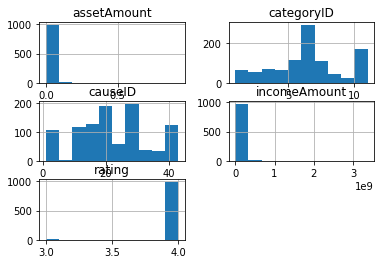

In [47]:
API_dataFrame.hist()
plt.tight_layout